## Least Squares Estimate

$$
\hat{\beta} = (X^T X)^{-1}  X^T Y
$$

* https://en.wikipedia.org/wiki/Ordinary_least_squares


In [91]:
import numpy as np

X = np.array([[1,1],
              [1,2],
              [1,0]])
Y = np.array([3,4,10])

lse = np.linalg.inv(X.T @ X ) @ X.T @ Y
Xlse = X@lse
inner_product = np.dot((Y-X@lse) , X@lse)

print("Design Matrix X:")
print(X)
print("\nY:")
print(Y)
print("\nLeast Squares Estimate:") 
print(lse)
print("\nX@LSE:")
print(Xlse)
print("\nInner product ((Y-X@LSE), X@LSE) = ", end="")
print(np.round(inner_product, decimals=8)) # 0

Design Matrix X:
[[1 1]
 [1 2]
 [1 0]]

Y:
[ 3  4 10]

Least Squares Estimate:
[ 8.66666667 -3.        ]

X@LSE:
[5.66666667 2.66666667 8.66666667]

Inner product ((Y-X@LSE), X@LSE) = -0.0


## Visualizing 

Minimizing $\|Y-X \beta \|$ w.r.t $\beta$ results in $(Y-X\beta) \perp X\beta = 0$.

where $X\beta$ is in ColumnSpace of $X$

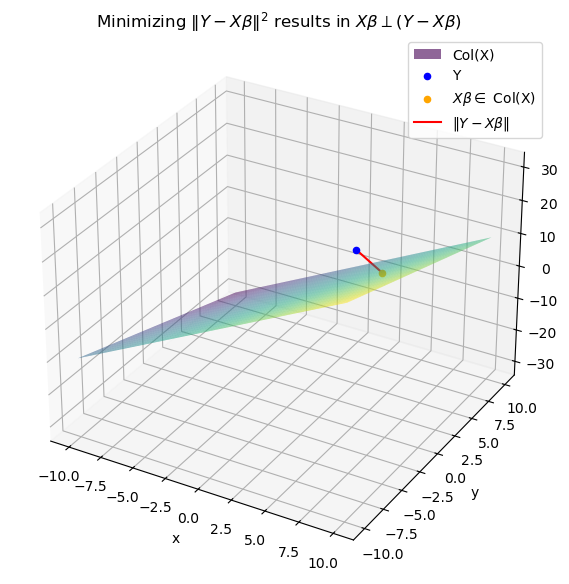

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the grid for x and y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

# Define z as per the equation z = 2*x - y
z = 2 * x - y

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.6, label="Col(X)")

# Plot Y and X@LSE
ax.scatter(Y[0], Y[1], Y[2], label="Y", color="blue")
ax.scatter(Xlse[0], Xlse[1], Xlse[2], label="$X\\beta \\in$ Col(X)", color="orange")
ax.plot([Y[0],Xlse[0]], [Y[1],Xlse[1]], [Y[2],Xlse[2]], color="red",label="$\\|Y-X\\beta\\|$")

ax.set_title('Minimizing $\\|Y-X\\beta\\|^2$ results in $X\\beta\\perp (Y-X\\beta)$ ')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

plt.show()


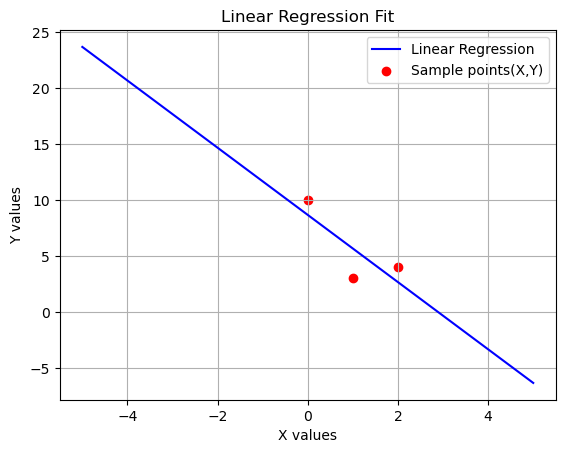

In [113]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,1000)
y = lse[0] + lse[1] * x 
fig, ax = plt.subplots()

ax.plot(x, y, label="Linear Regression", color="blue")
ax.scatter(X[:,1], Y, label="Sample points(X,Y)", color="red")
ax.set_xlabel("X values")
ax.set_ylabel("Y values")
ax.set_title("Linear Regression Fit")
ax.legend()
ax.grid(True)
